# Neural networks in human emotions - an overview, part 2.

Hello and welcome! In this notebook we will continue to analyze the best suitable neural network architectures and machine learning techniques that may help us while building the **sentiment classifier**. (Reading this notebook assumes that you are familiar with the first one.)

In [1]:
import numpy as np
import pandas as pd

### Analyzing the datasets

Just like the last time, we will analyze two datasets and see which one suits better for our use-case.

#### Dataset #1

In [2]:
from sklearn.model_selection import train_test_split
df1_pre_train = pd.read_csv(filepath_or_buffer="./dataset3/train.csv", encoding='latin1')
df1_test = pd.read_csv(filepath_or_buffer="./dataset3/test.csv", encoding='latin1')
df1_pre_train.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [3]:
df1_pre_train.tail()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral,morning,0-20,Guinea,13132795,246000.0,53


This dataset is quite interesting so far! Let's note a couple of things:

1. This dataset is *not human labeled*. The authors themselves say that this is a machine-labeled dataset. They assumed that every paragraph with a ":)" is positive, and with ":(" is negative. This *may* be a downside, since if we make the same parallel with positive and negative words, positive words like "great" can be used in a sarcastic manner. However, people do not usually tend to use text emoticons the same way, which is why this is only a tiny downside.

2. This dataset has two columns for text: "text" and "selected_text". We are going to take in account "text" and labels only, since the "selected_text", meaning the text that has the most impact on the prediction, is not reproducable during inference.

3. This dataset, in the "text" values, is quite diverse! The paragraphs range from 1 to 3-4 sentences, which is just the length that we need.

4. This dataset has additional parameters, such as "Time of Tweet", "Age of User", "Country", etc. If we pick this dataset, we will NOT use these values for training, since once again, they are not reproducable during inference.

Let's see how many samples for each sentiment we have!

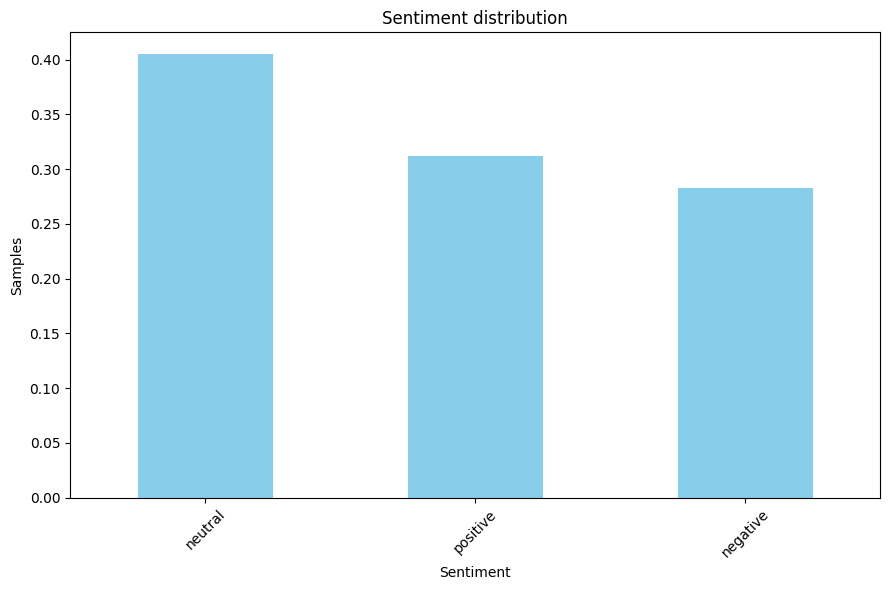

In [4]:
import matplotlib.pyplot as plt

sentiment_counts = df1_pre_train['sentiment'].value_counts(normalize=True)
plt.figure(figsize=(9, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment distribution')
plt.xlabel('Sentiment')
plt.ylabel('Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see a pretty nice and even ditribution! It is not ideal, of course, but it certainly fits in the "good" category.

Since we do not need any more info on this dataset and on the other columns in there, we can analyze the second one and then compare them.

#### Dataset #2


In [5]:
df2 = pd.read_csv(filepath_or_buffer="./archive4.zip", compression='zip', encoding='utf-8')
df2.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


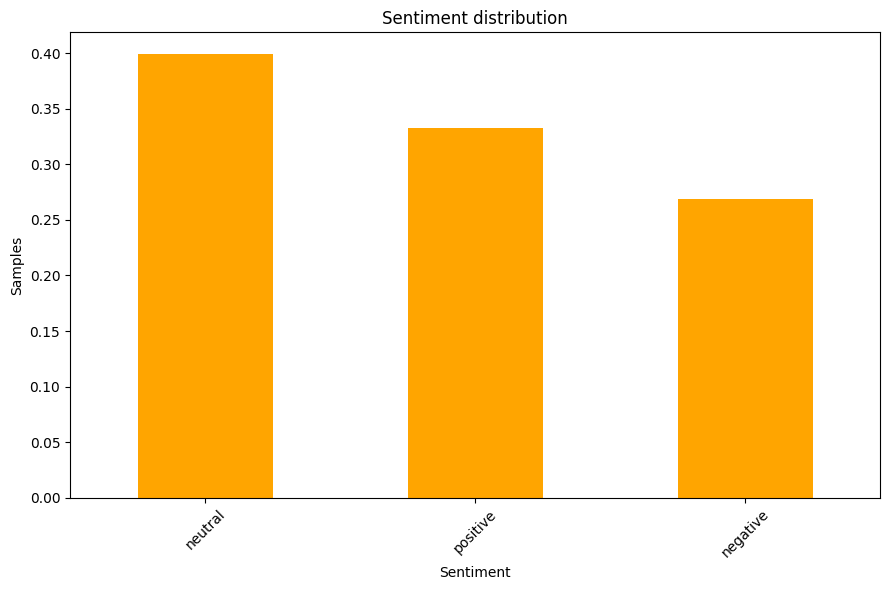

In [6]:
sentiment_counts = df2['sentiment'].value_counts(normalize=True)
plt.figure(figsize=(9, 6))
sentiment_counts.plot(kind='bar', color='orange')
plt.title('Sentiment distribution')
plt.xlabel('Sentiment')
plt.ylabel('Samples')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This dataset, while having a nice perk to it, considering that this is human-labeled, has just a bit worse of a distribution than the previous one. However, it does introduce a bit more diversity:

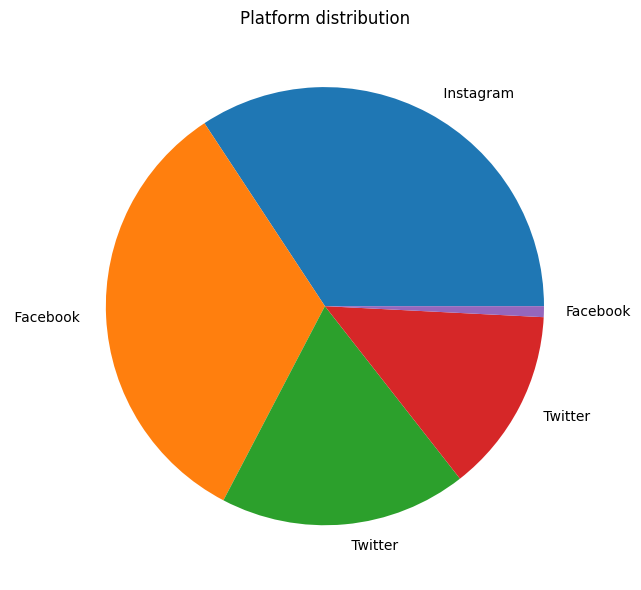

In [7]:
platform_counts = df2['Platform'].value_counts(normalize=True)
plt.figure(figsize=(9, 6))
platform_counts.plot(kind='pie')
plt.title('Platform distribution')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

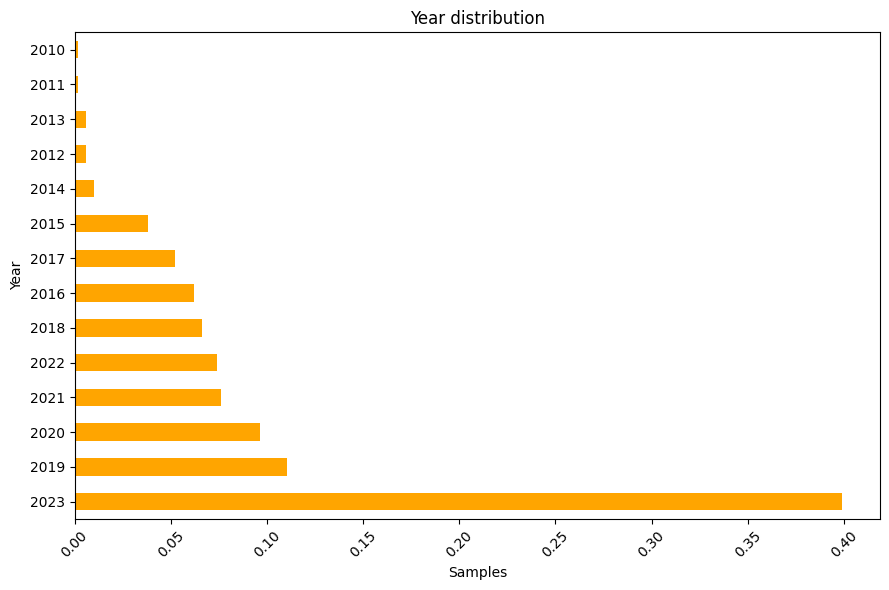

In [8]:
year_counts = df2['Year'].value_counts(normalize=True)
plt.figure(figsize=(9, 6))
year_counts.plot(kind='barh', color='orange')
plt.title('Year distribution')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The diversity, meaning that the texts are from different platforms and years, is a nice addition! However, there is a MAJOR drawback to this dataset: **the sample count**.

In [9]:
df2.tail()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter
498,2019,3,25,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


The sample count is just below 500. This is very small, especially compared to our first dataset which is 27.480 entries long.

HOWEVER, we due to the fact that they both have text and sentiment columns, we can combine them into one dataset.

#### Making the final dataset.

In [10]:
df1_all = pd.concat([df1_pre_train[['text', 'sentiment']], df1_test[['text', 'sentiment']]], ignore_index=True)
df2 = df2[['text', 'sentiment']]

df_combined = pd.concat([df1_all, df2], ignore_index=True)

df_combined = df_combined.sample(frac=1.0, random_state=42).reset_index(drop=True)

In [11]:
print(df_combined.isnull().sum())

text         1282
sentiment    1281
dtype: int64


In [12]:
df_combined.dropna(how='all', inplace=True)
df_combined.reset_index(drop=True, inplace=True) 
df_combined.fillna('UNK', inplace=True)

In [13]:
print(df_combined.isnull().sum())

text         0
sentiment    0
dtype: int64


In [14]:
import re
def full_text_cleaning_pipeline(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df_combined['clean_text'] = df_combined['text'].apply(full_text_cleaning_pipeline)

In [15]:
def convert_words_to_vec_format(input_path, output_path):
    with open(input_path, 'r', encoding='utf-8') as infile:
        lines = infile.readlines()

    vocab_size = len(lines)
    embedding_dim = len(lines[0].split()) - 1

    with open(output_path, 'w', encoding='utf-8') as outfile:
        outfile.write(f"{vocab_size} {embedding_dim}\n")
        outfile.writelines(lines)

In [16]:
#Used to convert a file to .vec, uncomment if you do not have the file already.
#convert_words_to_vec_format("./bow5.words", "./bow5.vec")

In [17]:
from gensim.models import KeyedVectors
gen_emb = KeyedVectors.load_word2vec_format("./bow5.vec")

In [18]:
#This code is useful if you are using WordsEmbAug. However, the dataset
#is augmented with SynonimAug, as it proved to be the best one in our case.
#gen_emb.save_word2vec_format("bow5.bin", binary=True)

In [19]:
from nlpaug.augmenter.word import WordEmbsAug, BackTranslationAug, SynonymAug
#
#We could play with BackTranslation, however, this is one of the most inefficient methods of augmentation.
#augmenter = WordEmbsAug(model_type='word2vec', model_path="./bow5.bin", action='insert')
#augmenter = BackTranslationAug(
#    from_model_name='Helsinki-NLP/opus-mt-en-de', 
#    to_model_name='Helsinki-NLP/opus-mt-de-en', device='cuda'
#)
#
augmenter = SynonymAug(aug_src='wordnet', aug_p=0.1);

c:\Users\Kolyamba\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Kolyamba\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Here is the interesting thing, we need to **augment** the dataset. This is because the dataset, as we have it right now, is quite small and *will* lead to overfitting on the models we are going to discuss, as they are just going to memorize all of the data. Because of that, we are going to substitute 90% of the entries with synonims and then add them to the original dataset.

In [20]:
# This code runs quite long, which is why it is preferable to run it once and then save the dataset.
from tqdm import tqdm
import math
source_texts = []
aug_texts = []
aug_labels = []
percentage = (len(df_combined) / 100 * 90)
percentage = math.ceil(percentage)
print(percentage)
batch_size = 16

for i in tqdm(range(0, percentage, batch_size)):
    batch = df_combined.sample(n=batch_size, replace=True, random_state=i)
    texts = batch['clean_text'].tolist()
    labels = batch['sentiment'].tolist()
    aug_batch = augmenter.augment(texts)
    aug_texts.extend(aug_batch)
    aug_labels.extend(labels)

28363


100%|██████████| 1773/1773 [00:21<00:00, 82.58it/s]


In [21]:
print(aug_texts[:32])
print(aug_labels[:32])

['your mail server just rejected a simple plain reply to you as potential spamvirus threat not serious', 'yes but are on the wrong wireless plan', 'awwww ill be waiting then hope it doesnt rain', 'are you in need of another kiss attack', 'spent the whole twenty four hours editing in pro toolsi luvvv this thing and am becoming quite the pro but it gives me mad headaches', 'how long before the frisbee golfer accidentally catches one in the back of the head from his friend', 'watching hostage too got an idea for that liveliness im making hope to have it ready and post a link here by the fifth of june', 'im not getting any treatments we are just gonna hang out at the pool and the hot tubs', 'well for one thing i might be branded a public menace by the nation', 'o dear so youre going to be that kiddoe and im going to sit there doing zero amazing wheres the shopping', 'join the golf club', 'hanging prohibited with my babyy', 'morden be at i. a. richards if not and so ill see you when youwe g

In [22]:
df_augmented = pd.DataFrame({
    "clean_text": aug_texts,
    "sentiment": aug_labels
})

In [23]:
df_combined_clean = pd.DataFrame({
    "clean_text": df_combined["clean_text"].copy().tolist(),
    "sentiment": df_combined["sentiment"].copy().tolist()
})

In [24]:
df_result = pd.concat([df_augmented, df_combined_clean], ignore_index=True)

df_result = df_result.sample(frac=1.0, random_state=42).reset_index(drop=True)

In [25]:
df_result.to_csv("sentiment_dataset_combined_augmented.csv", index=False)

In [26]:
#Uncomment this and comment the previous augmentation logic if you already have sentiment_dataset_combined_augmented.csv
#df_result = pd.read_csv(filepath_or_buffer="./sentiment_dataset_combined_augmented.csv")

In [27]:
print(df_result.isnull().sum())

clean_text    0
sentiment     0
dtype: int64


In [28]:
df_result.dropna(how='all', inplace=True)
df_result.reset_index(drop=True, inplace=True) 
df_result.fillna('UNK', inplace=True)

In [29]:
print(df_result.isnull().sum())

clean_text    0
sentiment     0
dtype: int64


In [30]:
df_train, df_temp = train_test_split(df_result, test_size=0.3, random_state=42)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

print("Training size:", len(df_train))
print("Validation size:", len(df_val))
print("Test size:", len(df_test))
print("Sentiment distribution:\n", df_combined['sentiment'].value_counts())

Training size: 41917
Validation size: 8982
Test size: 8983
Sentiment distribution:
 sentiment
neutral     12747
positive     9851
negative     8916
Name: count, dtype: int64


### Building the model.

#### Machine learning approaches - the baseline.

Once again, we are starting with BoW + Naive Bayes as our baseline - what can we do, it crushed the competition the last time!

However, let's test and see how well it performs on the current task...

In [31]:
df_train.head()

,clean_text,sentiment
12618,im the bird with broken wings shes the strain ...,positive
48588,im baking cookies what are you doing,neutral
5999,because information technology like ten times ...,positive
13620,i need a java,neutral
35251,its sturdy being a thick chik,negative


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

x_train_data = np.array(df_train['clean_text'])
y_train_data = np.array(df_train['sentiment'])
x_test_data = np.array(df_test['clean_text'])
y_test_data = np.array(df_test['sentiment'])

count_vectorizer = CountVectorizer()
x_train = count_vectorizer.fit_transform(x_train_data)
x_test = count_vectorizer.transform(x_test_data)


print("Entries for training: ", x_train.shape)
print("Entries for testing: ", x_test.shape)

Entries for training:  (41917, 28194)
Entries for testing:  (8983, 28194)


In [33]:
modelNB = MultinomialNB()
modelNB.fit(x_train, y_train_data)

y_pred = modelNB.predict(x_test)
print(classification_report(y_test_data, y_pred))
print("Accuracy: ", accuracy_score(y_test_data, y_pred))

              precision    recall  f1-score   support

    negative       0.77      0.72      0.75      2541
     neutral       0.72      0.77      0.75      3670
    positive       0.80      0.78      0.79      2772

    accuracy                           0.76      8983
   macro avg       0.77      0.76      0.76      8983
weighted avg       0.76      0.76      0.76      8983

Accuracy:  0.7593231659801848


Oh wow! Look at the accuracy difference between BoW+Naive Bayes when we tried to classify languages and sentiment!

But let's not panick - this is just the baseline. If we can not do better than this, and we **absolutely** can, then we will use BoW + Naive Bayes, but it is way too early to speak about this.

When analyzing machine learning approaches, let's analyze them with BoW first, and then with TF-IDF just so that we do not have to repeat much code.

In [34]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(multi_class="multinomial", solver="saga", max_iter=1000)
modelLR.fit(x_train, y_train_data)

y_pred = modelLR.predict(x_test)
print(classification_report(y_test_data, y_pred))
print("Accuracy: ", accuracy_score(y_test_data, y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.77      0.79      2541
     neutral       0.77      0.82      0.79      3670
    positive       0.85      0.83      0.84      2772

    accuracy                           0.81      8983
   macro avg       0.81      0.81      0.81      8983
weighted avg       0.81      0.81      0.81      8983

Accuracy:  0.8078592897695648


Great, we are already getting better at the accuracy with vanilla machine learning techniques! This was our BoW + Logistic Regression.

In [35]:
from sklearn.linear_model import SGDClassifier
modelSGD = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
modelSGD.fit(x_train, y_train_data)

y_pred = modelSGD.predict(x_test)
print(classification_report(y_test_data, y_pred))
print("Accuracy: ", accuracy_score(y_test_data, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.68      0.73      2541
     neutral       0.70      0.79      0.74      3670
    positive       0.81      0.76      0.78      2772

    accuracy                           0.75      8983
   macro avg       0.76      0.74      0.75      8983
weighted avg       0.76      0.75      0.75      8983

Accuracy:  0.7505287765779807


So far so strong, let's get to TF-IDF approaches!

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer


x_train_data = np.array(df_train['clean_text'])
y_train_data = np.array(df_train['sentiment'])
x_test_data = np.array(df_test['clean_text'])
y_test_data = np.array(df_test['sentiment'])

tf_idf_vectorizer = TfidfVectorizer()
x_train = tf_idf_vectorizer.fit_transform(x_train_data)
x_test = tf_idf_vectorizer.transform(x_test_data)


print("Entries for training: ", x_train.shape)
print("Entries for testing: ", x_test.shape)

Entries for training:  (41917, 28194)
Entries for testing:  (8983, 28194)


In [37]:
modelNB = MultinomialNB()
modelNB.fit(x_train, y_train_data)

y_pred = modelNB.predict(x_test)
print(classification_report(y_test_data, y_pred))
print("Accuracy: ", accuracy_score(y_test_data, y_pred))

              precision    recall  f1-score   support

    negative       0.86      0.55      0.67      2541
     neutral       0.63      0.88      0.74      3670
    positive       0.85      0.68      0.76      2772

    accuracy                           0.73      8983
   macro avg       0.78      0.71      0.72      8983
weighted avg       0.76      0.73      0.73      8983

Accuracy:  0.7281531782255372


In [38]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(multi_class="multinomial", solver="saga", max_iter=1000)
modelLR.fit(x_train, y_train_data)

y_pred = modelLR.predict(x_test)
print(classification_report(y_test_data, y_pred))
print("Accuracy: ", accuracy_score(y_test_data, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.70      0.74      2541
     neutral       0.71      0.80      0.75      3670
    positive       0.83      0.77      0.80      2772

    accuracy                           0.76      8983
   macro avg       0.78      0.76      0.76      8983
weighted avg       0.77      0.76      0.76      8983

Accuracy:  0.7627741289101636


In [39]:
from sklearn.linear_model import SGDClassifier
modelSGD = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)
modelSGD.fit(x_train, y_train_data)

y_pred = modelSGD.predict(x_test)
print(classification_report(y_test_data, y_pred))
print("Accuracy: ", accuracy_score(y_test_data, y_pred))

              precision    recall  f1-score   support

    negative       0.76      0.58      0.65      2541
     neutral       0.62      0.80      0.70      3670
    positive       0.80      0.68      0.73      2772

    accuracy                           0.70      8983
   macro avg       0.73      0.68      0.70      8983
weighted avg       0.72      0.70      0.70      8983

Accuracy:  0.6985416898586219


Okay, we have tried out 6 classic machine learning approaches as a combination of three algorithms: Naive Bayes, Logistic Regression and SGD - and two vectorizers: BoW and TF-IDF.

These approaches are not very sophisticated, I might even say that they are too simple for our task, but you have seen it all yourself: they still perform well.

Let's get to more interesting approaches!

#### Neural networks - preparation phase.

This is the preparation phase of data for our neural netwoks! Unlike machine-learning techniques, they often require specific handling (you saw that in the first part), which is why the data needs to be additionally worked with.

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

if torch.cuda.is_available:
    device = 'cuda'
else:
    device = 'cpu'

Let's prepare the vocabulary. With the following code, we ensure that there is a minimal risk of typos getting into it.

In [41]:
tokens = list()
tokens.append("UNK")
tokens.append("PAD")
for item in list(count_vectorizer.vocabulary_):
    count = count_vectorizer.vocabulary_[item]
    if count > 5:
        tokens.append(item)

In [42]:
token_to_id = {token: id for id, token in enumerate(tokens)}
print("Sample values:")
print(tokens[-10:])
print("VOCABULARY LENGTH: ", len(list(token_to_id)))
print()
print("SAMPLE ID OF PAD: ", token_to_id['PAD'])

Sample values:
['foxy', 'crazyyy', 'dayem', 'discriminating', 'plainly', 'relocation', 'crossfit', 'hotok', 'blagh', 'eeek']
VOCABULARY LENGTH:  28190

SAMPLE ID OF PAD:  1


Uh-Oh! We can see a lot of *domain-specific* words and typos, even in this list of 10 last words in the vocabulary.

Here is one of the most interesting things about the preparation phase that we have skipped in the first part, because the language there was quite broad: training the model on the set of words that is present in the training dataset or training it on a general word embedding.

On one hand, training on a general word embedding, such as Word2Vec could be a plus, since it knows much more about the "meaning" of the words. However, since our data is received from twitter, we might end up skipping a lot of domain-specific words there, which is quite bad. There is also the issue of meaning of words in general use / slang.

On the other hand, we could train the embedding ourselves, using the words in our dataset and using the Embedding layer, as we did previously with LSTMs and the CNN neural networks. However, then, if we try to classify a sentence that is quite general in its meaning, our model might miss some words, which is not a preferable outcome.

In this case, we will **fine-tune pre-trained embeddings**! This allows for general language understanding and for our dataset slang.

Now we should choose which general embedding to choose from. There are multiple embeddings, but a lot of them have a *huge* vocabulary which would slow down training of the model immensely. Because of that, we are going to use [this embedding](https://levyomer.wordpress.com/2014/04/25/dependency-based-word-embeddings/), (the k = 5 BoW one), since it has around 175K tokens in its vocabulary.

Now, we *could* use the dependency-based approach, as described in [this paper](https://levyomer.wordpress.com/wp-content/uploads/2014/04/dependency-based-word-embeddings-acl-2014.pdf) by the same author, but since our twitter data is domain-specific, we most likely do not want to get anything more sophisticated than a BoW based Word2Vec embedding.

In [43]:
def convert_words_to_vec_format(input_path, output_path):
    with open(input_path, 'r', encoding='utf-8') as infile:
        lines = infile.readlines()

    vocab_size = len(lines)
    embedding_dim = len(lines[0].split()) - 1

    with open(output_path, 'w', encoding='utf-8') as outfile:
        outfile.write(f"{vocab_size} {embedding_dim}\n")
        outfile.writelines(lines)

In [44]:
#Used to convert a file to .vec, uncomment if you do not have the file already.
#convert_words_to_vec_format("./bow5.words", "./bow5.vec")

In [45]:
from gensim.models import KeyedVectors
gen_emb = KeyedVectors.load_word2vec_format("./bow5.vec")

In [46]:
print(gen_emb['hello'].shape)

(300,)


In [47]:
print(gen_emb.get_vector('hello'))

[-5.08556627e-02  2.78512146e-02  2.86401957e-02  2.14692764e-02
  2.26632715e-03 -1.22125156e-01  1.23387389e-02 -6.25858381e-02
 -9.76038072e-03  7.18502980e-03  3.71744297e-02  3.90507765e-02
 -9.72429756e-03  2.91236234e-03 -2.36143991e-02 -4.71700449e-03
  1.77086025e-01 -3.48160416e-03  5.13356216e-02  1.30698942e-02
 -5.01911230e-02  8.02432075e-02 -1.53841013e-02 -9.04305726e-02
 -1.06222238e-02  7.67086297e-02  2.70946156e-02 -1.34386405e-01
 -3.99325090e-03 -6.84979931e-02 -1.09571069e-01 -6.09551370e-02
 -1.82694010e-02  5.28469682e-02 -3.68688740e-02  1.48541816e-02
  4.57477532e-02 -5.06706163e-02 -6.93077967e-02  3.80256325e-02
 -2.44121701e-02  1.65732410e-02  2.61569042e-02 -6.34462908e-02
 -8.03405866e-02 -8.93258601e-02  1.84072591e-02  4.65189219e-02
  1.26019642e-01  4.45810482e-02 -5.11535816e-02  4.83311992e-03
  8.81075785e-02  9.41943675e-02  1.88201386e-02 -5.28120399e-02
  1.44947797e-01  4.79201674e-02 -3.11935730e-02  7.02135861e-02
  8.10472220e-02 -4.11630

Great! Our pre-trained embedding is here and running.

Now, how are we going to use this? There are a couple of approaches:

1. Look up each word from `tokens` in the pre-trained embedding and assemble into a matrix. This is nice and allows the NN to generalize a bit better than having only seen the random vectors initially, but does not counter this problem: if we have the word "penguin" in our query during inference, and if the model has **not** seen it during training, we will have to use the **UNK** token to replace the word, and we have to minimize the possibility of ever using that!

2. Add K-top words from the pre-trained embedding to ours. Considering that our embedding consists of ~30.000 words, we can add the same amount to the vocabulary and use that. This works nicely, but increases the size of the vocab. This is probably its only downside, as even if the model does not see the words from the pre-trained embedding during training, we can still get the vectors from it, and it will be better than assigning the **UNK** token.

3. Use **sub-word tokenization**. This is quite a complicate technique, which we probably won't use, but we should mention it here. Sub-word tokenization is when we tokenize the text now word-by-word, but into pieces of words. For example, tokenizing `"Hello world"` with normal tokenization will result in an array of `["Hello", "world"]`. However, if we use sub-word tokenization, it might look something like this: `["He", "llo", "wo" "rld"]`. This works well, because even if we have not seen the word, we *might* have seen some pieces of it, and that would help us make predictions. *Fun fact: this is the type of tokenization used by the big guys, such as BERT and ChatGPT!*

In the following models we will use the second approach, as the third one is quite complex and the first one is simply not complex enough. However, we *might* try it if we have to use transfer learning to get an adequate accuracy (which I hope we can achieve by building our own models).

In [48]:
tokens_gen = list()
for key in gen_emb.key_to_index.keys():
    tokens_gen.append(key)

In [49]:
for token in tokens_gen[:50000]:
    if token not in tokens:
        tokens.append(token)

In [50]:
token_to_id = {token: id for id, token in enumerate(tokens)}
print("Sample values:")
print(tokens[-10:])
print("VOCABULARY LENGTH: ", len(list(token_to_id)))
print()
print("SAMPLE ID OF PAD: ", token_to_id['PAD'])

Sample values:
['jochen', 'eyeball', 'stockdale', 'copycat', 'culp', 'coriander', 'outliers', 'piaget', 'distillers', "o'farrell"]
VOCABULARY LENGTH:  64218

SAMPLE ID OF PAD:  1


In [87]:
import pickle

with open("tokenizer_data.pkl", "wb") as f:
    pickle.dump((tokens, token_to_id), f)

Okay, we can see that there *were* some duplicates in the vocabulary, but now we have 64.763 unique tokens. This is way better than the initial 26.000 we have started with.

Now, let's build our embedding matrix.

In [52]:
vocab_size = len(tokens)
embedding_matrix = np.zeros((vocab_size, 300)) #300 is the dimension of the embedding!
for word, idx in token_to_id.items():
    if word in gen_emb:
        embedding_matrix[idx] = gen_emb.get_vector(word)
    else:
        embedding_matrix[idx] = np.random.normal(scale=0.6, size=(300, ))

Awesome! Now we have a matrix full of embeddings that we can use to train our model (and to fine-tune the embeddings themselves!)

##### Method re-implementation

We need to re-implement some methods from the first part here so that our models can run properly. Do not worry, if you have read the first part - you can safely skip this. The logic in the methods is almost the same except for the columns.

In [53]:
UNK_IX, PAD_IX = map(token_to_id.get, ["UNK", "PAD"])

def as_matrix(sequences, max_len=None):
    """ Convert a list of tokens into a matrix with padding """
    if isinstance(sequences[0], str):
        sequences = list(map(str.split, sequences))
        
    max_len = min(max(map(len, sequences)), max_len or float('inf'))
    
    matrix = np.full((len(sequences), max_len), np.int32(PAD_IX))
    for i,seq in enumerate(sequences):
        row_ix = [token_to_id.get(word, UNK_IX) for word in seq[:max_len]]
        matrix[i, :len(row_ix)] = row_ix
    
    return matrix

In [54]:
def to_tensors(batch, device):
    batch_tensors = dict()
    for key, arr in batch.items():
        if key == 'clean_text' or key == 'sentiment':
            batch_tensors[key] = torch.tensor(arr, device=device, dtype=torch.int64)
        else:
            batch_tensors[key] = torch.tensor(arr, device=device)
    return batch_tensors

In [55]:
def apply_word_dropout(matrix, keep_prop, replace_with=UNK_IX, pad_ix=PAD_IX,):
    dropout_mask = np.random.choice(2, np.shape(matrix), p=[keep_prop, 1 - keep_prop]).astype(np.float32)
    dropout_mask &= matrix != pad_ix
    return np.choose(dropout_mask, [matrix, np.full_like(matrix, replace_with)])

In [56]:
def make_batch(data, max_len=None, word_dropout=0, device=device):
    batch = {}
    batch['clean_text'] = as_matrix(data['clean_text'].values, max_len)

    if word_dropout != 0:
        batch['clean_text'] = apply_word_dropout(batch['clean_text'], 1. - word_dropout)
    
    if 'sentiment_id' in data.columns:
        batch['sentiment'] = data['sentiment_id'].values
    return to_tensors(batch, device)

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_train['sentiment_id'] = le.fit_transform(df_train['sentiment'])
df_test['sentiment_id'] = le.transform(df_test['sentiment'])
df_val['sentiment_id'] = le.transform(df_val['sentiment'])


make_batch(df_train[:3], max_len=10)
print("Total sentiments in train dataset: ", df_train['sentiment_id'].unique())
print("Total sentiments in test dataset: ", df_test['sentiment_id'].unique())
print("Total classes in train dataset: ", df_train['sentiment'].unique())
print("Total classes in test dataset: ", df_test['sentiment'].unique())

Total sentiments in train dataset:  [2 1 0]
Total sentiments in test dataset:  [1 0 2]
Total classes in train dataset:  ['positive' 'neutral' 'negative']
Total classes in test dataset:  ['neutral' 'negative' 'positive']


In [58]:
def iterate_minibatches(data, batch_size=256, shuffle=True, cycle=False, device=device, **kwargs):
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)

        for start in range(0, len(indices), batch_size):
            batch = make_batch(data.iloc[indices[start : start + batch_size]], device=device, **kwargs)
            yield batch
        
        if not cycle: break

In [59]:
from tqdm.auto import tqdm
from torch.amp import autocast, GradScaler

In [60]:
def evaluate_model(model, data_test, batch_size, criterion=None):
    model.eval()
    test_correct = 0
    test_examples = 0
    total_val_loss = 0
    avg_val_loss = 0
    with torch.no_grad():
        for i, batch in tqdm(enumerate(iterate_minibatches(data_test, batch_size, device=device, shuffle=False)), total=len(data_test) // batch_size):
            out_data = model(batch['clean_text'])
            targets = batch['sentiment']
            if criterion:
               loss = criterion(out_data, targets)
            predictions = torch.argmax(out_data, dim=1)
            test_correct += (predictions == targets).sum().item()
            test_examples += targets.size(0)
            if criterion:
                total_val_loss += loss.item()
    test_accuracy = test_correct / test_examples
    if criterion:
        avg_val_loss = total_val_loss / test_examples
    return test_accuracy, avg_val_loss

In [61]:
def train_model(epochs, model, scaler, criterion, optimizer, data_train, data_val, batch_size, scheduler=None, num_unfreeze=3):
    #############################################################################
    ### Returns last_accuracy, total_accuracy, total_loss, total_val_accuracy ###
    #############################################################################
    total_loss = list()
    total_accuracy = list()
    total_val_accuracy = list()
    for epoch in range(epochs):
        total_correct = 0
        total_examples = 0
        total_loss_epoch = 0
        if epoch == num_unfreeze:
            model.embedding.weight.requires_grad = True
        print(f"epoch: ", {epoch})
        model.train()
        for i, batch in tqdm(enumerate(iterate_minibatches(data_train, batch_size, device=device)), total=len(data_train) // batch_size):
            optimizer.zero_grad()
            targets = batch['sentiment']
            with autocast(device_type=device):
                logits = model(batch['clean_text'])
                loss = criterion(logits, targets)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            predictions = torch.argmax(logits, dim=1)
            correct = (predictions == targets).sum().item()
            total_loss_epoch += loss.item()
            total_correct = total_correct + correct
            total_examples += targets.size(0)

        validation_accuracy, validation_loss = evaluate_model(model, data_val, batch_size, criterion)

        epoch_loss = total_loss_epoch / total_examples
        epoch_accuracy = total_correct / total_examples
        total_loss.append(total_loss_epoch)
        total_accuracy.append(epoch_accuracy)
        total_val_accuracy.append(validation_accuracy)
        if scheduler:
            scheduler.step(validation_loss)
        print(f"Epoch {epoch + 1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}, Val_accuracy = {validation_accuracy:.4f}, Val_loss = {validation_loss:.4f}")
    return epoch_accuracy, total_accuracy, total_loss, total_val_accuracy

Everyting looks good! We have the following labels to work with:

0. Negative
1. Neutral
2. Positive

Let's build the first model!

#### 1D Convolutional Neural Network.

Just like in the first notebook, we will try the least sophisticated NN model first. Why is this the least sophisticated? The answer is quite simple: it does not require any attention mechanisms, LSTMs or positional encodings.

In [62]:
class SentimentClassifierCNN(nn.Module):
    def __init__(self, vocabulary_dim, embedding_matrix, num_sentiments=3):
        super().__init__()
        self.embedding = nn.Embedding(vocabulary_dim, 300)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
        self.embedding.weight.requires_grad = False
        self.embedding_dropout = nn.Dropout(0.5)
        self.conv1 = nn.Conv1d(300, 256, 7)
        self.pool1 = nn.AdaptiveAvgPool1d(output_size=128)
        self.conv2 = nn.Conv1d(256, 128, 5)
        self.pool2 = nn.AdaptiveAvgPool1d(output_size=64)
        self.conv3 = nn.Conv1d(128, 64, 3)
        self.pool3 = nn.AdaptiveAvgPool1d(output_size=32)

        self.dropout_conv = nn.Dropout(0.3)

        self.fc1 = nn.Linear(in_features=(32 * 64), out_features=64)
        self.fc2 = nn.Linear(in_features=64, out_features=num_sentiments)

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)
        x = x.transpose(1, 2)

        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.dropout_conv(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [63]:
df_train.head()

,clean_text,sentiment,sentiment_id
12618,im the bird with broken wings shes the strain ...,positive,2
48588,im baking cookies what are you doing,neutral,1
5999,because information technology like ten times ...,positive,2
13620,i need a java,neutral,1
35251,its sturdy being a thick chik,negative,0


In [64]:
modelCNN = SentimentClassifierCNN(len(tokens), embedding_matrix=embedding_matrix, num_sentiments=3).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCNN.parameters(), lr=1e-3)

epochs = 13
batch_size = 128
scaler = GradScaler()

train_accuracy, total_accuracy, total_loss, total_val_accuracy = train_model(epochs=epochs, model=modelCNN, scaler=scaler, 
                                                         criterion=criterion, optimizer=optimizer,
                                                           data_train=df_train, data_val=df_val, batch_size=128,
                                                           num_unfreeze=6)

test_accuracy, test_loss = evaluate_model(model=modelCNN, data_test=df_test, batch_size=128)
print("Test accuracy: ", test_accuracy)

epoch:  {0}


328it [00:04, 78.03it/s]                          
71it [00:00, 197.50it/s]                        


Epoch 1: Loss = 0.0082, Accuracy = 0.4448, Val_accuracy = 0.5134, Val_loss = 0.0078
epoch:  {1}


328it [00:02, 114.46it/s]                         
71it [00:00, 267.86it/s]                        


Epoch 2: Loss = 0.0077, Accuracy = 0.5073, Val_accuracy = 0.5469, Val_loss = 0.0073
epoch:  {2}


328it [00:02, 113.64it/s]                         
71it [00:00, 256.09it/s]                        


Epoch 3: Loss = 0.0073, Accuracy = 0.5531, Val_accuracy = 0.5821, Val_loss = 0.0070
epoch:  {3}


328it [00:02, 113.06it/s]                         
71it [00:00, 269.36it/s]                        


Epoch 4: Loss = 0.0069, Accuracy = 0.5831, Val_accuracy = 0.6109, Val_loss = 0.0067
epoch:  {4}


328it [00:02, 110.59it/s]                         
71it [00:00, 269.92it/s]                        


Epoch 5: Loss = 0.0066, Accuracy = 0.6127, Val_accuracy = 0.6335, Val_loss = 0.0064
epoch:  {5}


328it [00:02, 113.60it/s]                         
71it [00:00, 264.09it/s]                        


Epoch 6: Loss = 0.0062, Accuracy = 0.6386, Val_accuracy = 0.6386, Val_loss = 0.0063
epoch:  {6}


328it [00:04, 72.58it/s]                         
71it [00:00, 259.40it/s]                        


Epoch 7: Loss = 0.0054, Accuracy = 0.7037, Val_accuracy = 0.7266, Val_loss = 0.0051
epoch:  {7}


328it [00:04, 75.37it/s]                         
71it [00:00, 262.19it/s]                        


Epoch 8: Loss = 0.0040, Accuracy = 0.7888, Val_accuracy = 0.7758, Val_loss = 0.0046
epoch:  {8}


328it [00:04, 73.08it/s]                         
71it [00:00, 261.75it/s]                        


Epoch 9: Loss = 0.0030, Accuracy = 0.8433, Val_accuracy = 0.7934, Val_loss = 0.0047
epoch:  {9}


328it [00:04, 74.06it/s]                         
71it [00:00, 270.75it/s]                        


Epoch 10: Loss = 0.0023, Accuracy = 0.8849, Val_accuracy = 0.8193, Val_loss = 0.0043
epoch:  {10}


328it [00:04, 73.49it/s]                         
71it [00:00, 260.79it/s]                        


Epoch 11: Loss = 0.0018, Accuracy = 0.9133, Val_accuracy = 0.8190, Val_loss = 0.0044
epoch:  {11}


328it [00:04, 74.09it/s]                         
71it [00:00, 269.72it/s]                        


Epoch 12: Loss = 0.0015, Accuracy = 0.9301, Val_accuracy = 0.8294, Val_loss = 0.0044
epoch:  {12}


328it [00:04, 74.10it/s]                         
71it [00:00, 264.76it/s]                        


Epoch 13: Loss = 0.0012, Accuracy = 0.9427, Val_accuracy = 0.8400, Val_loss = 0.0050


71it [00:00, 266.93it/s]                        

Test accuracy:  0.8409217410664589


Great! We are starting off strong with the NNs, already getting an accuracy higher than the ML approaches.

Let's plot that on a graph.

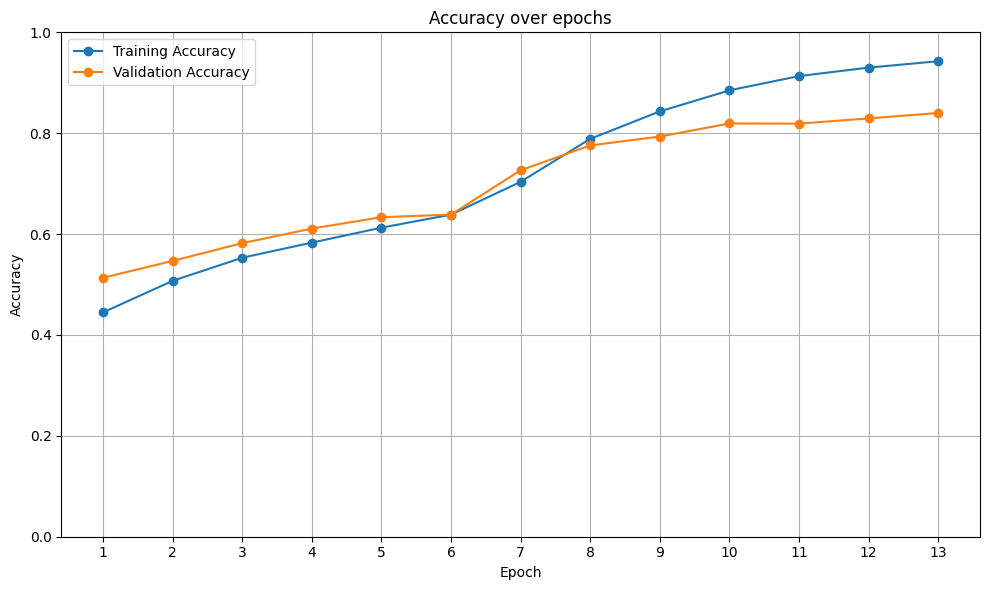

In [65]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, total_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, total_val_accuracy, label='Validation Accuracy', marker='o')

plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Everything looks just like we expected: it plateaus a bit, then unfreezes the embedding layer, and then starts learning again. Note that this is a pattern we are going to see a lot going forward.

#### Reccurent Neural Network with LSTMs.

In [66]:
class SentimentClassifierRNN(nn.Module):
    def __init__(self, vocabulary_dimention, num_classes, hidden_dim, num_layers=1):
        super().__init__()

        self.embedding = nn.Embedding(vocabulary_dimention, 300)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
        self.embedding.weight.requires_grad = False
        self.embedding_dropout = nn.Dropout(0.5)
        self.lstm = nn.LSTM(300, hidden_size=hidden_dim, num_layers=num_layers, bidirectional=True, dropout=0.5)
        self.fc = nn.Linear(hidden_dim * 2, num_classes)
    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)
        x = x.permute(1, 0, 2)
        _, (h_n, _) = self.lstm(x)
        final_hidden = torch.cat((h_n[-2], h_n[-1]), dim=1)
        out = self.fc(final_hidden)
        return out

There is nothing to say about this NN, as it is mostly an adaptation of the one from the first part. Let's see how this performs.

In [67]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
modelRNN = SentimentClassifierRNN(len(tokens), num_classes=3, hidden_dim=128, num_layers=4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(modelRNN.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer, 'max', 0.5, 2, verbose=True)

epochs = 16
batch_size = 128

total_accuracy = list()
total_loss = list()
scaler = GradScaler()

train_accuracy, total_accuracy, total_loss, total_val_accuracy = train_model(epochs=epochs, model=modelRNN, scaler=scaler, 
                                                         criterion=criterion, optimizer=optimizer,
                                                           data_train=df_train, data_val=df_val, batch_size=128
                                                           , scheduler=scheduler
                                                           , num_unfreeze=8
                                                           )

test_accuracy, test_loss = evaluate_model(modelRNN, df_test, batch_size=128)
print("--------------")
print("Test accuracy: ", test_accuracy)

epoch:  {0}


328it [00:04, 75.22it/s]                         
71it [00:00, 128.71it/s]                        


Epoch 1: Loss = 0.0081, Accuracy = 0.4601, Val_accuracy = 0.5690, Val_loss = 0.0072
epoch:  {1}


328it [00:04, 79.15it/s]                         
71it [00:00, 150.57it/s]                        


Epoch 2: Loss = 0.0072, Accuracy = 0.5754, Val_accuracy = 0.6258, Val_loss = 0.0066
epoch:  {2}


328it [00:04, 76.40it/s]                         
71it [00:00, 146.72it/s]                        


Epoch 3: Loss = 0.0066, Accuracy = 0.6173, Val_accuracy = 0.6690, Val_loss = 0.0060
epoch:  {3}


328it [00:04, 78.87it/s]                         
71it [00:00, 151.16it/s]                        


Epoch 4: Loss = 0.0061, Accuracy = 0.6559, Val_accuracy = 0.6837, Val_loss = 0.0057
epoch:  {4}


328it [00:04, 77.83it/s]                         
71it [00:00, 146.32it/s]                        


Epoch 5: Loss = 0.0058, Accuracy = 0.6762, Val_accuracy = 0.7011, Val_loss = 0.0055
epoch:  {5}


328it [00:04, 77.60it/s]                         
71it [00:00, 145.63it/s]                        


Epoch 6: Loss = 0.0057, Accuracy = 0.6852, Val_accuracy = 0.7113, Val_loss = 0.0053
epoch:  {6}


328it [00:04, 78.18it/s]                         
71it [00:00, 151.50it/s]                        


Epoch 7: Loss = 0.0056, Accuracy = 0.6913, Val_accuracy = 0.7182, Val_loss = 0.0053
epoch:  {7}


328it [00:04, 78.52it/s]                         
71it [00:00, 149.93it/s]                        


Epoch 8: Loss = 0.0055, Accuracy = 0.6978, Val_accuracy = 0.7227, Val_loss = 0.0051
epoch:  {8}


328it [00:05, 60.02it/s]                         
71it [00:00, 153.44it/s]                        


Epoch 9: Loss = 0.0050, Accuracy = 0.7329, Val_accuracy = 0.7658, Val_loss = 0.0046
epoch:  {9}


328it [00:05, 59.48it/s]                         
71it [00:00, 149.78it/s]                        


Epoch 10: Loss = 0.0043, Accuracy = 0.7766, Val_accuracy = 0.7816, Val_loss = 0.0043
epoch:  {10}


328it [00:05, 59.79it/s]                         
71it [00:00, 152.71it/s]                        


Epoch 11: Loss = 0.0038, Accuracy = 0.8101, Val_accuracy = 0.7961, Val_loss = 0.0041
epoch:  {11}


328it [00:05, 59.66it/s]                         
71it [00:00, 150.60it/s]                        


Epoch 12: Loss = 0.0035, Accuracy = 0.8263, Val_accuracy = 0.8042, Val_loss = 0.0040
epoch:  {12}


328it [00:05, 59.92it/s]                         
71it [00:00, 150.76it/s]                        


Epoch 13: Loss = 0.0032, Accuracy = 0.8389, Val_accuracy = 0.8123, Val_loss = 0.0041
epoch:  {13}


328it [00:05, 59.94it/s]                         
71it [00:00, 154.38it/s]                        


Epoch 14: Loss = 0.0030, Accuracy = 0.8503, Val_accuracy = 0.8146, Val_loss = 0.0039
epoch:  {14}


328it [00:05, 58.97it/s]                         
71it [00:00, 150.96it/s]                        


Epoch 15: Loss = 0.0029, Accuracy = 0.8561, Val_accuracy = 0.8199, Val_loss = 0.0039
epoch:  {15}


328it [00:05, 58.95it/s]                         
71it [00:00, 152.55it/s]                        


Epoch 16: Loss = 0.0028, Accuracy = 0.8635, Val_accuracy = 0.8209, Val_loss = 0.0039


71it [00:00, 152.19it/s]                        

--------------
Test accuracy:  0.8228876767226985


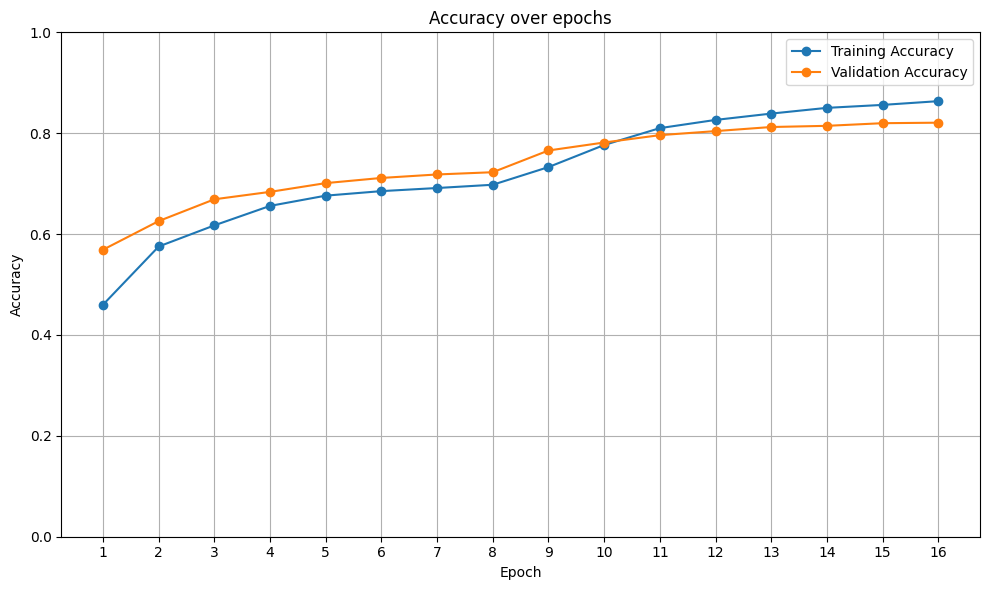

In [68]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, total_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, total_val_accuracy, label='Validation Accuracy', marker='o')

plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Something that we would have expected from a ML approach. Let's try its younger brother, GRUs!

#### Reccurent neural network with GRUs.

In [69]:
class SentimentClassifierGRU(nn.Module):
    def __init__(self, vocabulary_dimention, num_classes, hidden_dim, num_layers=1):
        super().__init__()

        self.embedding = nn.Embedding(vocabulary_dimention, 300)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
        self.embedding.weight.requires_grad = False

        self.embedding_dropout = nn.Dropout(0.5)
        self.rnn = nn.GRU(300, hidden_size=hidden_dim, num_layers=num_layers, bidirectional=True)
        self.rnn_dropout = nn.Dropout(0.5)

        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)
        x = x.permute(1, 0, 2)
        _, h_n = self.rnn(x)
        if self.rnn.bidirectional:
            final_hidden = torch.cat((h_n[-2], h_n[-1]), dim=1)
        else:
            final_hidden = h_n[-1]

        final_hidden = self.rnn_dropout(final_hidden)
        out = self.fc(final_hidden)
        return out

In [70]:
modelGRU = SentimentClassifierGRU(len(tokens), num_classes=3, hidden_dim=256, num_layers=4).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelGRU.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(optimizer, 'max', 0.5, 2, verbose=True)

epochs = 15
batch_size = 128

total_accuracy = list()
total_loss = list()
scaler = GradScaler()

train_accuracy, total_accuracy, total_loss, total_val_accuracy = train_model(epochs=epochs, model=modelGRU, scaler=scaler, 
                                                         criterion=criterion, optimizer=optimizer,
                                                           data_train=df_train, data_val=df_val, batch_size=128
                                                           , scheduler=scheduler
                                                           , num_unfreeze=6
                                                           )

test_accuracy, test_loss = evaluate_model(modelGRU, df_test, batch_size=128)
print("--------------")
print("Test accuracy: ", test_accuracy)

epoch:  {0}


328it [00:06, 52.77it/s]                         
71it [00:00, 143.06it/s]                        


Epoch 1: Loss = 0.0080, Accuracy = 0.4766, Val_accuracy = 0.6149, Val_loss = 0.0069
epoch:  {1}


328it [00:05, 55.77it/s]                         
71it [00:00, 139.70it/s]                        


Epoch 2: Loss = 0.0065, Accuracy = 0.6253, Val_accuracy = 0.6768, Val_loss = 0.0059
epoch:  {2}


328it [00:05, 55.96it/s]                         
71it [00:00, 147.03it/s]                        


Epoch 3: Loss = 0.0061, Accuracy = 0.6594, Val_accuracy = 0.7016, Val_loss = 0.0055
epoch:  {3}


328it [00:05, 55.67it/s]                         
71it [00:00, 144.04it/s]                        


Epoch 4: Loss = 0.0058, Accuracy = 0.6810, Val_accuracy = 0.7183, Val_loss = 0.0053
epoch:  {4}


328it [00:05, 55.63it/s]                         
71it [00:00, 144.91it/s]                        


Epoch 5: Loss = 0.0055, Accuracy = 0.7013, Val_accuracy = 0.7270, Val_loss = 0.0051
epoch:  {5}


328it [00:05, 54.85it/s]                         
71it [00:00, 147.69it/s]                        


Epoch 6: Loss = 0.0053, Accuracy = 0.7144, Val_accuracy = 0.7371, Val_loss = 0.0050
epoch:  {6}


328it [00:07, 44.55it/s]                         
71it [00:00, 144.84it/s]                        


Epoch 7: Loss = 0.0047, Accuracy = 0.7554, Val_accuracy = 0.7849, Val_loss = 0.0043
epoch:  {7}


328it [00:07, 44.69it/s]                         
71it [00:00, 140.53it/s]                        


Epoch 8: Loss = 0.0035, Accuracy = 0.8236, Val_accuracy = 0.8086, Val_loss = 0.0039
epoch:  {8}


328it [00:07, 45.52it/s]                         
71it [00:00, 141.72it/s]                        


Epoch 9: Loss = 0.0029, Accuracy = 0.8562, Val_accuracy = 0.8235, Val_loss = 0.0037
epoch:  {9}


328it [00:07, 44.83it/s]                         
71it [00:00, 143.27it/s]                        


Epoch 10: Loss = 0.0025, Accuracy = 0.8823, Val_accuracy = 0.8365, Val_loss = 0.0036
epoch:  {10}


328it [00:07, 44.97it/s]                         
71it [00:00, 146.85it/s]                        


Epoch 11: Loss = 0.0020, Accuracy = 0.9064, Val_accuracy = 0.8431, Val_loss = 0.0037
epoch:  {11}


328it [00:07, 45.11it/s]                         
71it [00:00, 141.58it/s]                        


Epoch 12: Loss = 0.0018, Accuracy = 0.9165, Val_accuracy = 0.8461, Val_loss = 0.0037
epoch:  {12}


328it [00:07, 45.00it/s]                         
71it [00:00, 144.74it/s]                        


Epoch 13: Loss = 0.0016, Accuracy = 0.9254, Val_accuracy = 0.8535, Val_loss = 0.0037
epoch:  {13}


328it [00:07, 44.28it/s]                         
71it [00:00, 142.44it/s]                        


Epoch 14: Loss = 0.0014, Accuracy = 0.9346, Val_accuracy = 0.8549, Val_loss = 0.0038
epoch:  {14}


328it [00:07, 44.89it/s]                         
71it [00:00, 145.83it/s]                        


Epoch 15: Loss = 0.0013, Accuracy = 0.9406, Val_accuracy = 0.8599, Val_loss = 0.0038


71it [00:00, 142.97it/s]                        

--------------
Test accuracy:  0.86173884003117


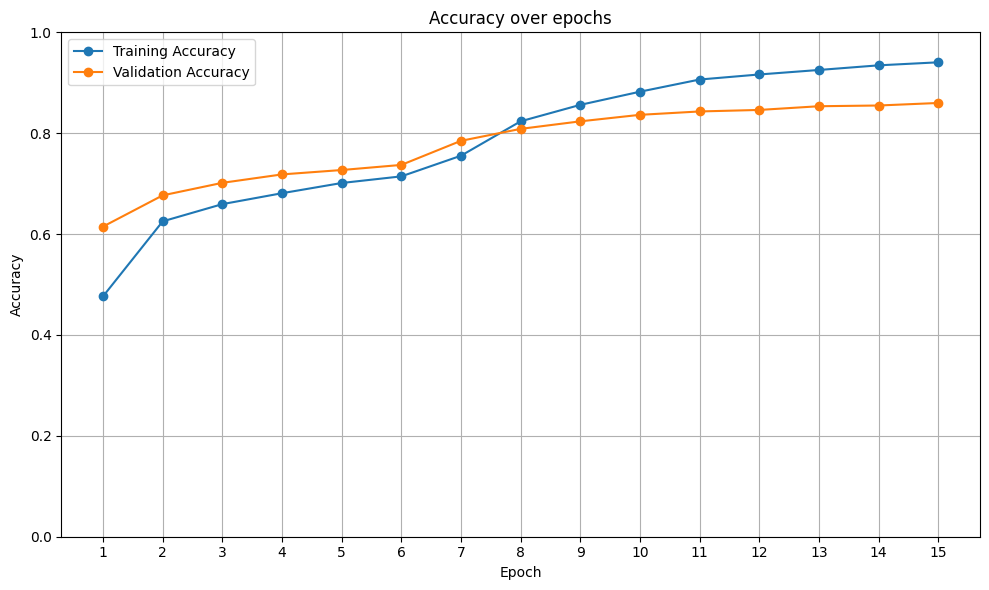

In [71]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, total_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, total_val_accuracy, label='Validation Accuracy', marker='o')

plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

These results are quite good. However, we can do another interesting thing with this: add some convolutional layers at the end! This will help us learn features of the output of the LSTM blocks, so while the LSTMs will introduce some "understanding" of the text at a lower level, we get some features at a highter level.

Let's make just that!

#### LSTM + CNN approach.

In [72]:
class SentimentClassifierCNNRNN(nn.Module):
    def __init__(self, vocabulary_dimention, num_classes, hidden_dim, num_layers=1, bidirectional=True):
        super().__init__()
        self.embedding = nn.Embedding(vocabulary_dimention, 300)
        self.embedding.weight.data.copy_(torch.from_numpy(embedding_matrix))
        self.embedding.weight.requires_grad = False
        self.embedding_dropout = nn.Dropout(0.5)
        self.lstm = nn.LSTM(300, hidden_size=hidden_dim, num_layers=num_layers, 
                            bidirectional=bidirectional, batch_first=True)
        self.lstm_dropout = nn.Dropout(0.5)
        self.conv1d = nn.Conv1d(in_channels=2 * hidden_dim, out_channels=100, kernel_size=3, padding=1)
        self.conv_dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(100, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)
        lstm_out, _ = self.lstm(x)
        lstm_out = self.lstm_dropout(lstm_out)
        lstm_out = lstm_out.permute(0, 2, 1)
        cnn_out = self.conv1d(lstm_out)
        cnn_out = F.relu(cnn_out)
        cnn_out = self.conv_dropout(cnn_out)
        pooled = F.max_pool1d(cnn_out, kernel_size=cnn_out.shape[2]).squeeze(2)
        out = self.fc(pooled)
        return out

In [73]:
modelCNNRNN = SentimentClassifierCNNRNN(len(tokens), num_classes=3, hidden_dim=256, num_layers=4, bidirectional=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelCNNRNN.parameters(), lr=1e-3, weight_decay=1e-5)
scheduler = ReduceLROnPlateau(optimizer, 'max', 0.5, 2, verbose=True)

epochs = 13
batch_size = 128

total_accuracy = list()
total_loss = list()
scaler = GradScaler()

train_accuracy, total_accuracy, total_loss, total_val_accuracy = train_model(epochs=epochs, model=modelCNNRNN, scaler=scaler, 
                                                         criterion=criterion, optimizer=optimizer,
                                                           data_train=df_train, data_val=df_val, batch_size=128
                                                           , scheduler=scheduler
                                                           , num_unfreeze=6
                                                           )

test_accuracy, test_loss = evaluate_model(modelCNNRNN, df_test, batch_size=128)
print("--------------")
print("Test accuracy: ", test_accuracy)

epoch:  {0}


328it [00:07, 44.39it/s]                         
71it [00:00, 124.17it/s]                        


Epoch 1: Loss = 0.0082, Accuracy = 0.4483, Val_accuracy = 0.5395, Val_loss = 0.0077
epoch:  {1}


328it [00:06, 47.12it/s]                         
71it [00:00, 130.64it/s]                        


Epoch 2: Loss = 0.0069, Accuracy = 0.5866, Val_accuracy = 0.6725, Val_loss = 0.0065
epoch:  {2}


328it [00:06, 47.22it/s]                         
71it [00:00, 123.81it/s]                        


Epoch 3: Loss = 0.0062, Accuracy = 0.6540, Val_accuracy = 0.6888, Val_loss = 0.0063
epoch:  {3}


328it [00:06, 46.89it/s]                         
71it [00:00, 125.47it/s]                        


Epoch 4: Loss = 0.0059, Accuracy = 0.6761, Val_accuracy = 0.6968, Val_loss = 0.0061
epoch:  {4}


328it [00:06, 47.39it/s]                         
71it [00:00, 128.54it/s]                        


Epoch 5: Loss = 0.0056, Accuracy = 0.6960, Val_accuracy = 0.7200, Val_loss = 0.0058
epoch:  {5}


328it [00:06, 47.62it/s]                         
71it [00:00, 125.74it/s]                        


Epoch 6: Loss = 0.0055, Accuracy = 0.7031, Val_accuracy = 0.7194, Val_loss = 0.0057
epoch:  {6}


328it [00:08, 38.17it/s]                         
71it [00:00, 124.39it/s]                        


Epoch 7: Loss = 0.0048, Accuracy = 0.7455, Val_accuracy = 0.7662, Val_loss = 0.0051
epoch:  {7}


328it [00:08, 38.18it/s]                         
71it [00:00, 125.25it/s]                        


Epoch 8: Loss = 0.0037, Accuracy = 0.8120, Val_accuracy = 0.7941, Val_loss = 0.0045
epoch:  {8}


328it [00:08, 38.74it/s]                         
71it [00:00, 124.36it/s]                        


Epoch 9: Loss = 0.0031, Accuracy = 0.8473, Val_accuracy = 0.8100, Val_loss = 0.0042
epoch:  {9}


328it [00:08, 38.34it/s]                         
71it [00:00, 124.84it/s]                        


Epoch 10: Loss = 0.0027, Accuracy = 0.8720, Val_accuracy = 0.8252, Val_loss = 0.0039
epoch:  {10}


328it [00:08, 38.83it/s]                         
71it [00:00, 122.94it/s]                        


Epoch 11: Loss = 0.0022, Accuracy = 0.8936, Val_accuracy = 0.8292, Val_loss = 0.0038
epoch:  {11}


328it [00:08, 38.39it/s]                         
71it [00:00, 126.90it/s]                        


Epoch 12: Loss = 0.0020, Accuracy = 0.9063, Val_accuracy = 0.8272, Val_loss = 0.0037
epoch:  {12}


328it [00:08, 38.33it/s]                         
71it [00:00, 128.85it/s]                        


Epoch 13: Loss = 0.0019, Accuracy = 0.9125, Val_accuracy = 0.8328, Val_loss = 0.0036


71it [00:00, 125.76it/s]                        

--------------
Test accuracy:  0.833463208282311


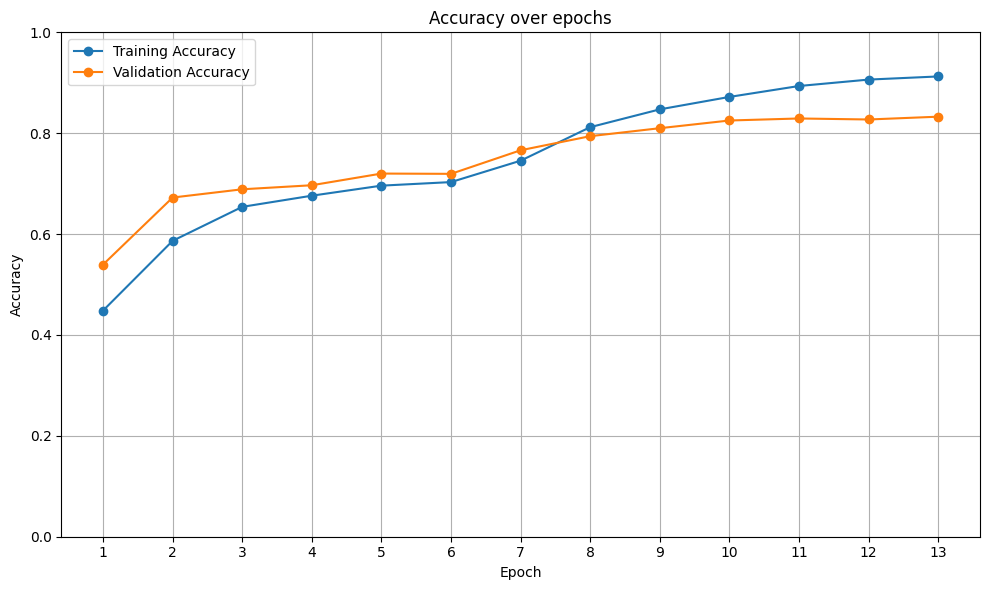

In [74]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, total_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, total_val_accuracy, label='Validation Accuracy', marker='o')

plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Not perfect, not terrible either.

Now you might be wondering - "What about transformers?"

Good question! We are going to try them right now. However, we are not going to build one from scratch - we would need a huge corpus of data to train it on, and we simply do not have that right now. We are going to try **transfer learning**!

#### Transfer Learning.

Transfer learning *might* be effective in our case because we get a model that is trained on a bigger dataset, so it has a bigger context and in general understand it better, and then take off the top classification layer from there, replacing it with our own. This approach can help our model generalize way better than the ones we have built before.

**However**, there is one drawback to this approach - transformers are generally data-hungry. This means that even considering the fact that the model we are going to try out is pre-trained, our simpler models might outshine it on small data.

Let's try and build this!

In [75]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [76]:
def make_batch_for_transformer(data, max_len=None, word_dropout=0, device=device):
    batch = {}
    encoding = tokenizer(list(data['clean_text'].values),
                         padding=True,
                         truncation=True,
                         max_length=max_len,
                         return_tensors='pt')

    batch['input_ids'] = encoding['input_ids'].to(device)
    batch['attention_mask'] = encoding['attention_mask'].to(device)
    
    if 'sentiment_id' in data.columns:
        batch['sentiment'] = torch.tensor(data['sentiment_id'].values, device=device, dtype=torch.long)

    return batch

In [77]:
def iterate_minibatches_transformer(data, batch_size=256, shuffle=True, cycle=False, device=device, **kwargs):
    while True:
        indices = np.arange(len(data))
        if shuffle:
            indices = np.random.permutation(indices)

        for start in range(0, len(indices), batch_size):
            batch = make_batch_for_transformer(data.iloc[indices[start : start + batch_size]], device=device, **kwargs)
            yield batch
        
        if not cycle: break

In [78]:
def evaluate_model_transformer(model, data_test, batch_size, criterion=None):
    model.eval()
    test_correct = 0
    test_examples = 0
    total_val_loss = 0
    avg_val_loss = 0
    with torch.no_grad():
        for i, batch in tqdm(enumerate(iterate_minibatches_transformer(data_test, batch_size, device=device, shuffle=False)), total=len(data_test) // batch_size):
            out_data = model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'], labels=batch['sentiment'])
            logits = out_data.logits
            targets = batch['sentiment']
            if criterion:
               loss = out_data.loss
            predictions = torch.argmax(logits, dim=1)
            test_correct += (predictions == targets).sum().item()
            test_examples += targets.size(0)
            if criterion:
                total_val_loss += loss.item()
    test_accuracy = test_correct / test_examples
    if criterion:
        avg_val_loss = total_val_loss / test_examples
    return test_accuracy, avg_val_loss

In [79]:
def train_model_transformer(epochs, model, scaler, criterion, optimizer, data_train, data_val, batch_size, scheduler=None, num_unfreeze=3):
    #############################################################################
    ### Returns last_accuracy, total_accuracy, total_loss, total_val_accuracy ###
    #############################################################################
    total_loss = list()
    total_accuracy = list()
    total_val_accuracy = list()
    for epoch in range(epochs):
        total_correct = 0
        total_examples = 0
        total_loss_epoch = 0
        print(f"epoch: ", {epoch})
        model.train()
        for i, batch in tqdm(enumerate(iterate_minibatches_transformer(data_train, batch_size, device=device)), total=len(data_train) // batch_size):
            optimizer.zero_grad()
            targets = batch['sentiment']
            with autocast(device_type=device):
                outputs = model(input_ids=batch['input_ids'], attention_mask=batch['attention_mask'], labels=batch['sentiment'])
                loss = outputs.loss
                logits = outputs.logits
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            predictions = torch.argmax(logits, dim=1)
            correct = (predictions == targets).sum().item()
            total_loss_epoch += loss.item()
            total_correct = total_correct + correct
            total_examples += targets.size(0)

        validation_accuracy, validation_loss = evaluate_model_transformer(model, data_val, batch_size, criterion)

        epoch_loss = total_loss_epoch / total_examples
        epoch_accuracy = total_correct / total_examples
        total_loss.append(total_loss_epoch)
        total_accuracy.append(epoch_accuracy)
        total_val_accuracy.append(validation_accuracy)
        if scheduler:
            scheduler.step(validation_loss)
        print(f"Epoch {epoch + 1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}, Val_accuracy = {validation_accuracy:.4f}, Val_loss = {validation_loss:.4f}")
    return epoch_accuracy, total_accuracy, total_loss, total_val_accuracy

In [80]:
def encode_texts(texts, max_length=128):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

In [81]:
from transformers import AdamW
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=1e-2)
scheduler = ReduceLROnPlateau(optimizer, 'max', 0.5, 2, verbose=True)

epochs = 7
batch_size = 64

total_accuracy = list()
total_loss = list()
scaler = GradScaler()

for param in model.distilbert.parameters():
    param.requires_grad = False

for layer in model.distilbert.transformer.layer[-2:]:
    for param in layer.parameters():
        param.requires_grad = True

train_accuracy, total_accuracy, total_loss, total_val_accuracy = train_model_transformer(epochs=epochs, model=model, scaler=scaler, 
                                                         criterion=criterion, optimizer=optimizer,
                                                           data_train=df_train, data_val=df_val, batch_size=128
                                                           , scheduler=scheduler
                                                           , num_unfreeze=6
                                                           )

test_accuracy, test_loss = evaluate_model_transformer(model, df_test, batch_size=128)
print("--------------")
print("Test accuracy: ", test_accuracy)

c:\Users\Kolyamba\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


epoch:  {0}


328it [00:27, 11.82it/s]                         
71it [00:06, 10.43it/s]                        


Epoch 1: Loss = 0.0064, Accuracy = 0.6213, Val_accuracy = 0.7188, Val_loss = 0.0053
epoch:  {1}


328it [00:27, 11.96it/s]                         
71it [00:06, 10.47it/s]                        


Epoch 2: Loss = 0.0050, Accuracy = 0.7292, Val_accuracy = 0.7375, Val_loss = 0.0049
epoch:  {2}


328it [00:27, 11.94it/s]                         
71it [00:06, 10.33it/s]                        


Epoch 3: Loss = 0.0047, Accuracy = 0.7480, Val_accuracy = 0.7525, Val_loss = 0.0048
epoch:  {3}


328it [00:27, 12.01it/s]                         
71it [00:06, 10.51it/s]                        


Epoch 4: Loss = 0.0045, Accuracy = 0.7596, Val_accuracy = 0.7605, Val_loss = 0.0046
epoch:  {4}


328it [00:27, 11.98it/s]                         
71it [00:06, 10.51it/s]                        


Epoch 5: Loss = 0.0044, Accuracy = 0.7716, Val_accuracy = 0.7664, Val_loss = 0.0046
epoch:  {5}


328it [00:27, 11.99it/s]                         
71it [00:06, 10.42it/s]                        


Epoch 6: Loss = 0.0043, Accuracy = 0.7776, Val_accuracy = 0.7694, Val_loss = 0.0045
epoch:  {6}


328it [00:27, 12.02it/s]                         
71it [00:06, 10.43it/s]                        


Epoch 7: Loss = 0.0042, Accuracy = 0.7830, Val_accuracy = 0.7695, Val_loss = 0.0045


71it [00:06, 10.36it/s]                        

--------------
Test accuracy:  0.7672269843036847


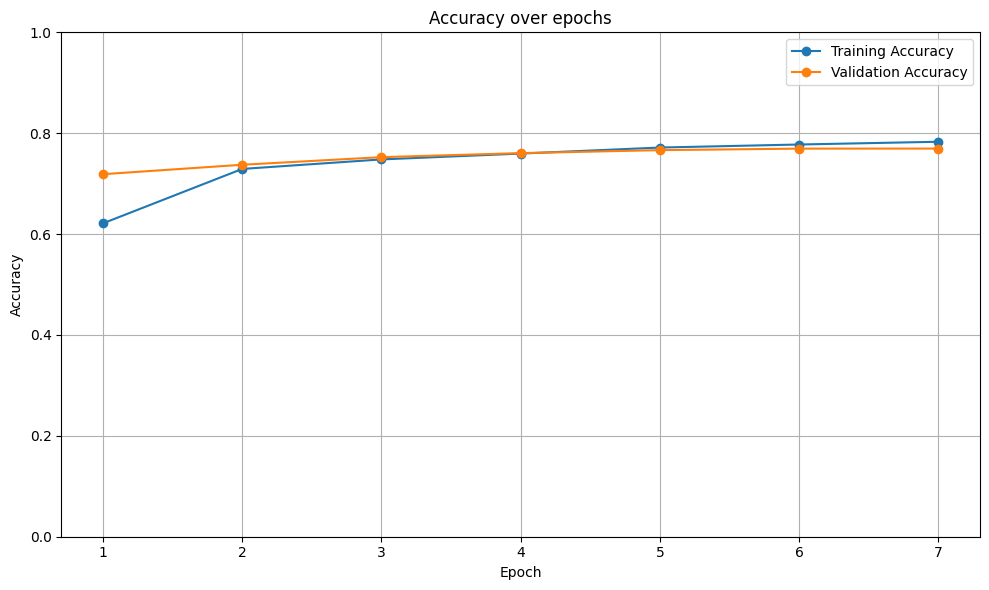

In [82]:
epochs_range = range(1, epochs + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs_range, total_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, total_val_accuracy, label='Validation Accuracy', marker='o')

plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(epochs_range)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

And this is something that we might have expected - there is simply not enough data for the model to shine as we would think it would.

We cannot really do much about it right now, as we do not have a team of people who would just label the data.

## Concluding the analysis.

Awesome, we have reached the end of the analysis of neural networks for this specific task. Let's do the same thing we have done in the previous notebook - plot them on a graph and visualize the results!

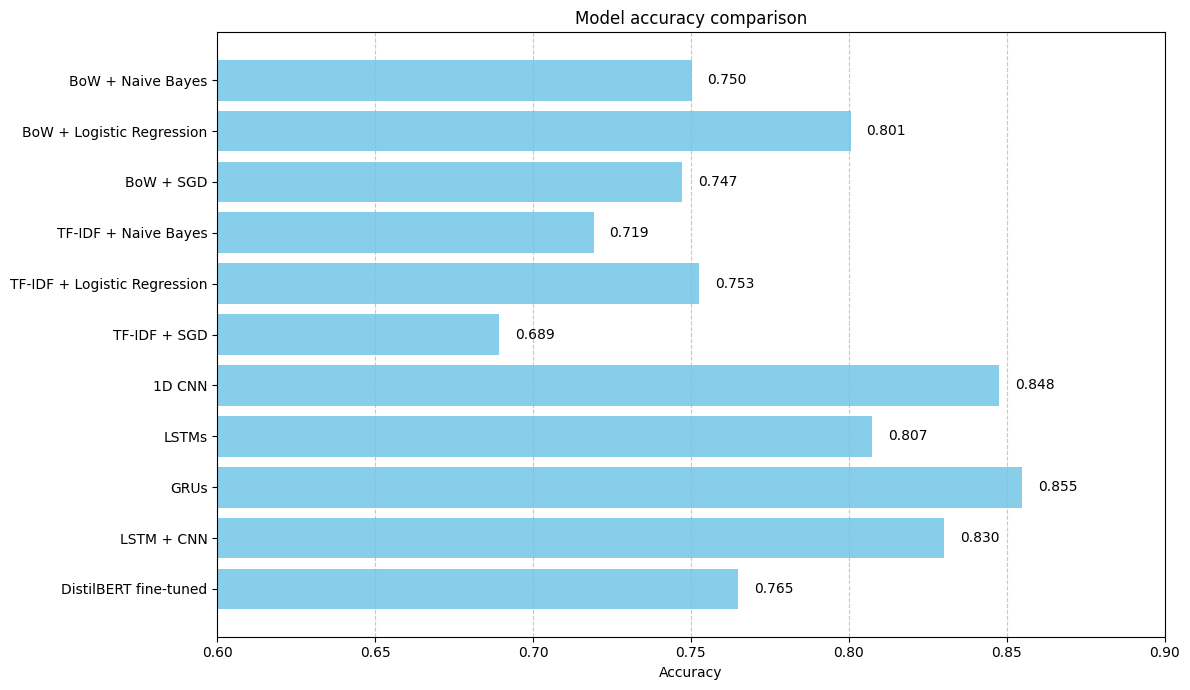

In [83]:
models = [
    "BoW + Naive Bayes",
    "BoW + Logistic Regression",
    "BoW + SGD",
    "TF-IDF + Naive Bayes",
    "TF-IDF + Logistic Regression",
    "TF-IDF + SGD",
    "1D CNN",
    "LSTMs",
    "GRUs",
    "LSTM + CNN",
    "DistilBERT fine-tuned"
]

accuracies = [
    0.7501948124234665,
    0.800623399755093,
    0.7471891350328398,
    0.7192474674384949,
    0.7525325615050651,
    0.6891906935322275,
    0.8476010241567405,
    0.8073026828453745,
    0.8548369141712123,
    0.8302348881220082,
    0.7648892352220862
]

plt.figure(figsize=(12, 7))
bars = plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model accuracy comparison')
plt.xlim(0.6, 0.9)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2, f'{width:.3f}', va='center')

plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

And our absolute winner is an RNN based on GRUs! Hooray!

In [84]:
test_accuracy, test_loss = evaluate_model(modelGRU, df_test, batch_size=128)
print("--------------")
print("Test accuracy: ", test_accuracy)

71it [00:00, 147.15it/s]                        

--------------
Test accuracy:  0.86173884003117


In [86]:
torch.save(modelGRU.state_dict(), "sentiment_classifier_gru.pth")

The model is saved and ready to work. Let's get to the third and final part!